# ioNERDSS Python Package Tutorial for Clathrin Self-assembly Analysis

## 1. Introduction

Clathrin is a 600kDa trimeric protrin that can assemble into both flat and spherical lattices in vivo and in vitro. In vivo, clathrin assembles on the plasma membrane and mediates endocytosis. In this tutorial, you will be guided through running and analyzing a simulation on this process using NERDSS and ioNERDSS.

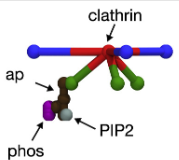

Clathrin does not bind to the membrane directly. It binds to an adaptor protein (ap), which then binds to the membrane lipid PI(4,5)P2 (PIP2). Therefore, for this simulation, we would need to include three species: **clathrin**, **adaptor protein**, and **PIP2**.

## 2.Generating NERDSS input files

### 2.1 .mol files
The .mol files keep track the parameters of each kind of molecule involved in the simulation
#### Clathrin
Each clathrin trimer has a COM and three leg binding sites rotated 120 degrees relative to each other, and each leg binding site is 10 nm from the center such that when dimerized, the centers are 21 nm apart. For binding to adapter proteins, each clathrin trimer includes three more leg sites, which locate directly below the legs (π/4.656 angle between the self-binding leg and ap binding leg).

From the above information, the coordinates of the binding sites of clathrin are (unit = nm):
- cd1 3.0000 5.1962 0.0000
- cd2 3.0000 -5.1962 0.0000
- cd3 -6.0000 0.0000 0.0000
- td1 1.8750 3.2476 -3.0000
- td2 1.8750 -3.2476 -3.0000
- td3 -3.7500 0.0000 -3.0000

The first three are self-binding sites and the last three are ap-binding sites.

The translational diffusion constants and rotational diffusion constants of clathrin we will use are Dt = [13, 13, 13] (unit = um2/s), Dr = [0.03, 0.03, 0.03] (unit = rad2/us).

To incorporate this molecule in the simulation, let's generate a .mol file using the gui.

In [1]:
import ioNERDSS as io # import the ioNERDSS package


Run the following code to bring up the gui, go the the ``Molecules`` tab, fill in the information as shown in the image below, and click ``"Add Molecule"``. 
- Note: Do not close the gui after finished for now as it will need the molecule information stored later.
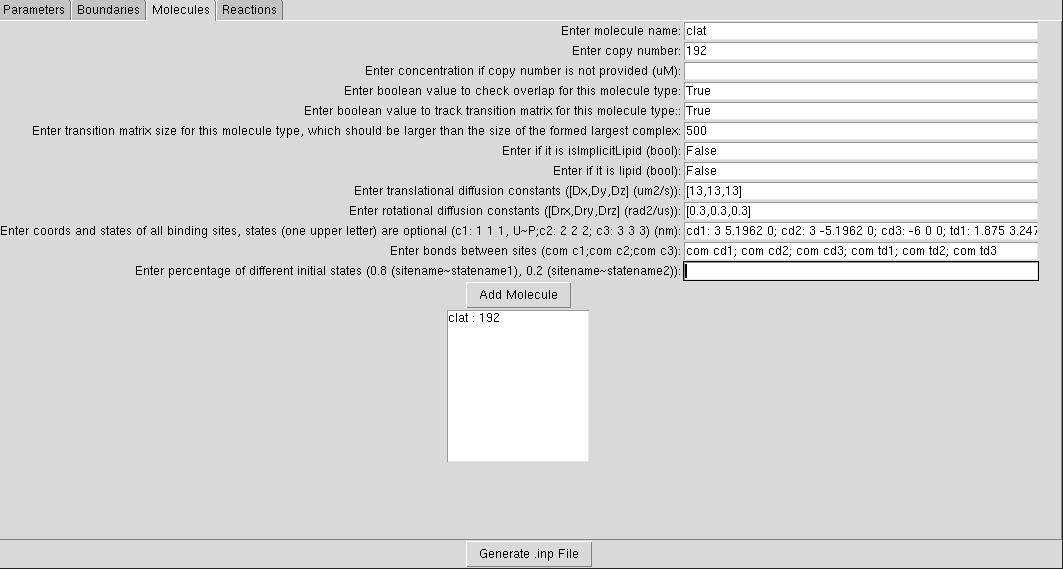

In [3]:
io.gui()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/yufengdu/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/home/yufengdu/.local/lib/python3.11/site-packages/ioNERDSS/functions/gui.py", line 969, in add_molecule
    create_mol_file_from_entries()
  File "/home/yufengdu/.local/lib/python3.11/site-packages/ioNERDSS/functions/gui.py", line 116, in create_mol_file_from_entries
    site_name, site_coord = site_str.split(':')
    ^^^^^^^^^^^^^^^^^^^^^
ValueError: not enough values to unpack (expected 2, got 1)


#### Adaptor Protein
The adaptor protein has two binding sites, one for clathrin and one for PIP2. Both sites are colinear with the COM and are both 2 nm apart from the COM.

The coordinates of the binding sites of adaptor protein are (unit = nm):
- m2muh 0 0 -2
- b2clat 0 0 2

The translational diffusion constants and rotational diffusion constants of ap we will use are Dt = [25, 25, 25] (unit = um2/s) , Dr = [0.5, 0.5, 0.5] (unit = rad2/us).

Again, let's fill in the information as below and again click ``Add Molecule`` when finished.
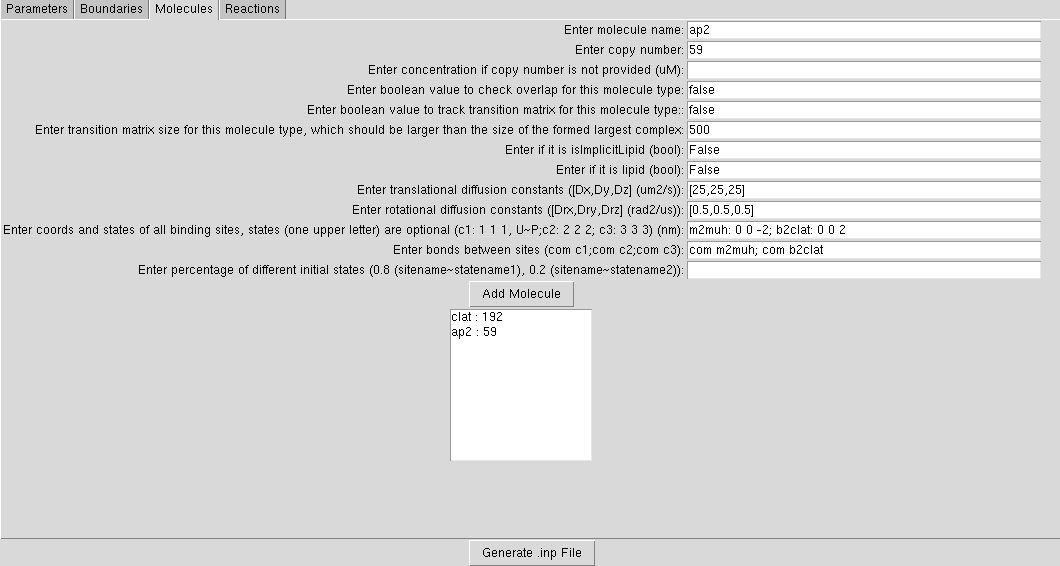

#### PIP2
This is the membrane lipid that binds to the adaptor protein. It has one binding site, which is 0.0001 nm above the COM. It only diffuses 2 dimensionally on the membrane, so we will set the translational diffusion constant in the z direction to 0. It also only rotates with respect to the z axis so its rotational diffusion constants in the x and y directions are 0.

The coordinate of the binding site of PIP2 is (unit = nm):
- head 0 0 0.0001

The translational diffusion constants and rotational diffusion constants of PIP2 we will use are Dt = [0.5, 0.5, 0] (unit = um2/s), Dr = [0, 0, 0.01] (unit = rad2/us).

Fill in the information and click ``Add Molecule`` when finished.
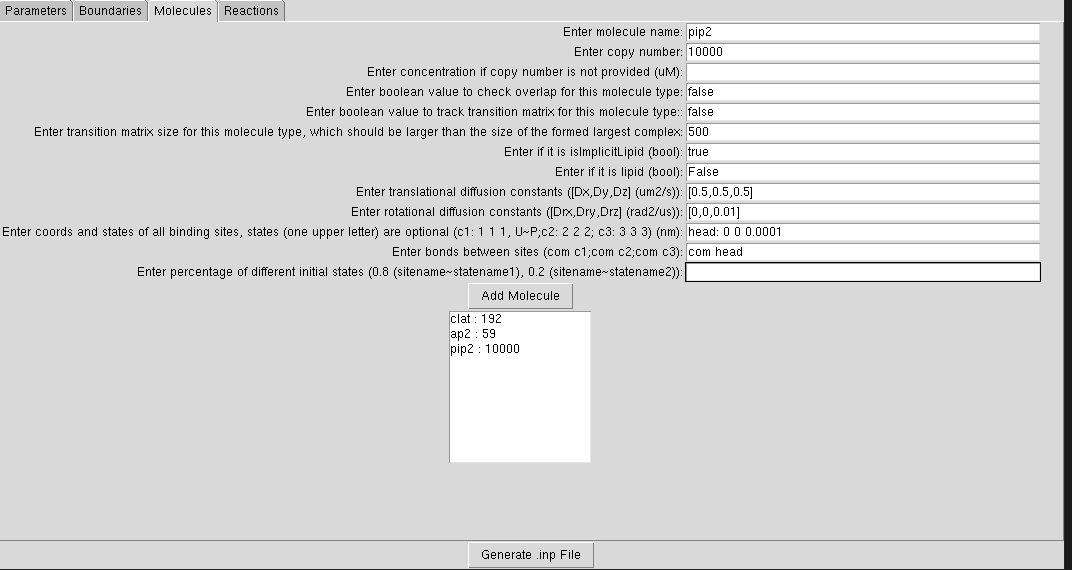

### 2.2 .inp file
The .inp file records the simulation parameters, reactions between molecules, and initial configuration of the system.

#### Parameters tab
Go to the ``Parameters`` tab and fill in the information as shown in the image below and do not click ``Generate .inp file`` just yet.
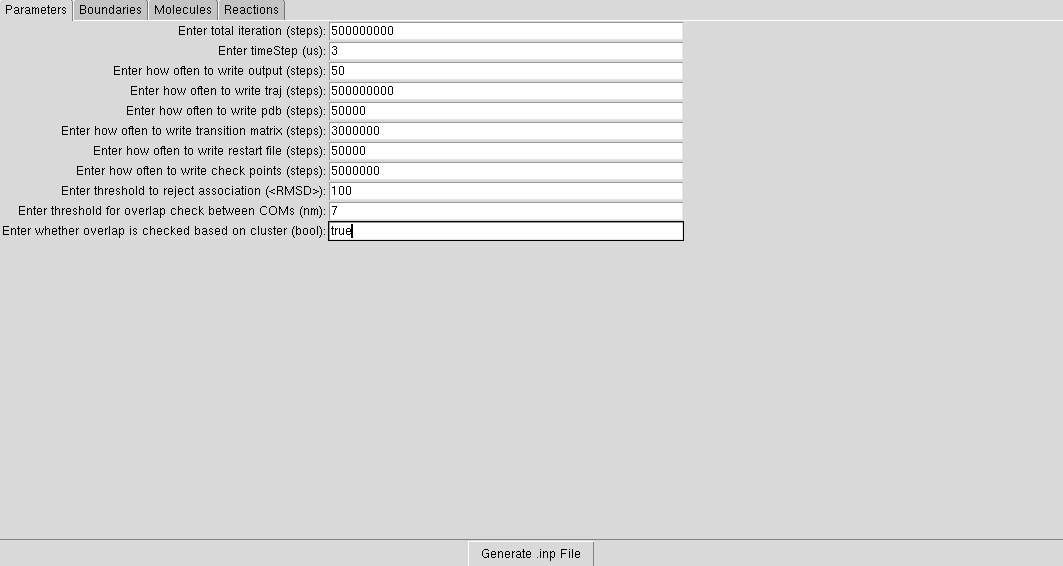
- Note: for detailed information on the meaning of these parameters, see the NERDSS user guide in the NERDSS github repository. Feel free to modify these parameters according to your preference.

#### Boundaries tab
Go to the ``Boundaries`` tab and fill in the information as shown in the image below and do not click ``Generate .inp file`` just yet.
- We will constraint this simulation to a box with dimensions 700, 700, 1000, nm.
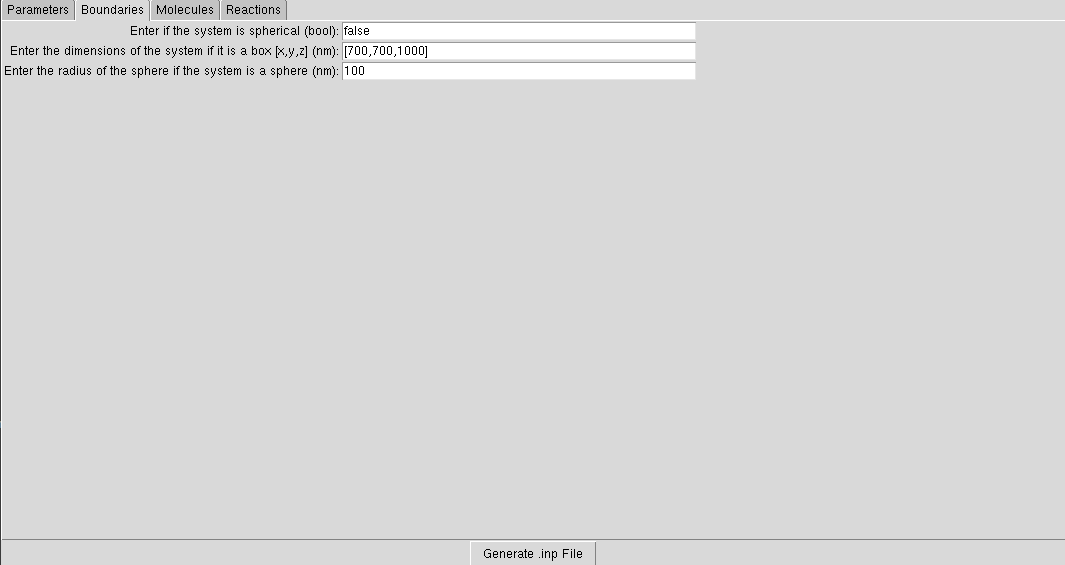